In [788]:
#ДЗ 
# 1. Для изображения sar_3.jpg найти наиболее протяженный участок
# (выделить линии при помощи преобразования Хафа)
# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

In [789]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Чтение оригинальной картинки

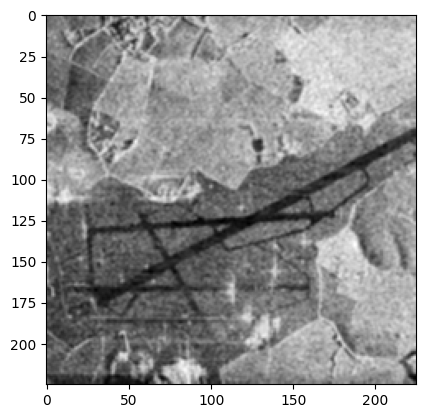

In [ ]:
image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray")


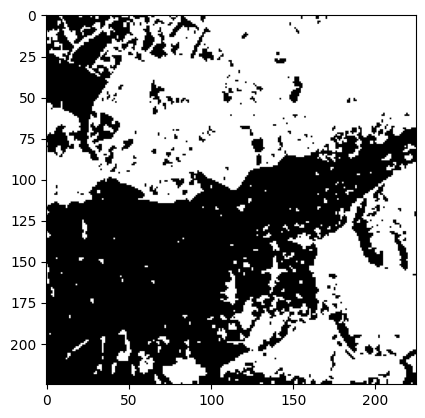

In [805]:
_,th2 = cv2.threshold(image_gray,0,50,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th2, cmap="gray")

1. Для изображения sar_3.jpg найти наиболее протяженный участок
(выделить линии при помощи преобразования Хафа)

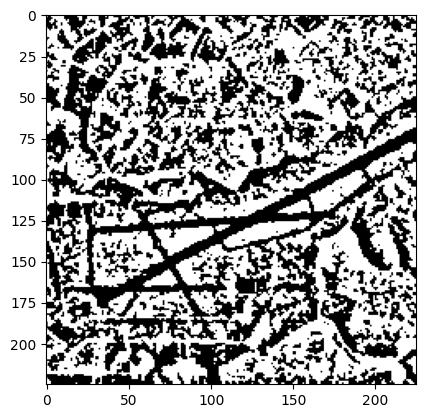

In [803]:
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,35,3)
plt.imshow(th3, cmap="gray")

In [793]:

# Вычисление градиента
sobelx = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)
grad = np.sqrt(sobelx**2 + sobely**2)

# Статистика
grad_min, grad_max, grad_mean, grad_std = np.min(grad), np.max(grad), np.mean(grad), np.std(grad)
print(f"Градиент: min={grad_min:.2f}, max={grad_max:.2f}, mean={grad_mean:.2f}, std={grad_std:.2f}")

# Рекомендация
thresh2 = int(grad_mean + 2 * grad_std)
thresh1 = int(0.4 * thresh2)
print(f"Рекомендуемые: thresh1={thresh1}, thresh2={thresh2}")

Градиент: min=0.00, max=536.26, mean=83.39, std=61.69
Рекомендуемые: thresh1=82, thresh2=206


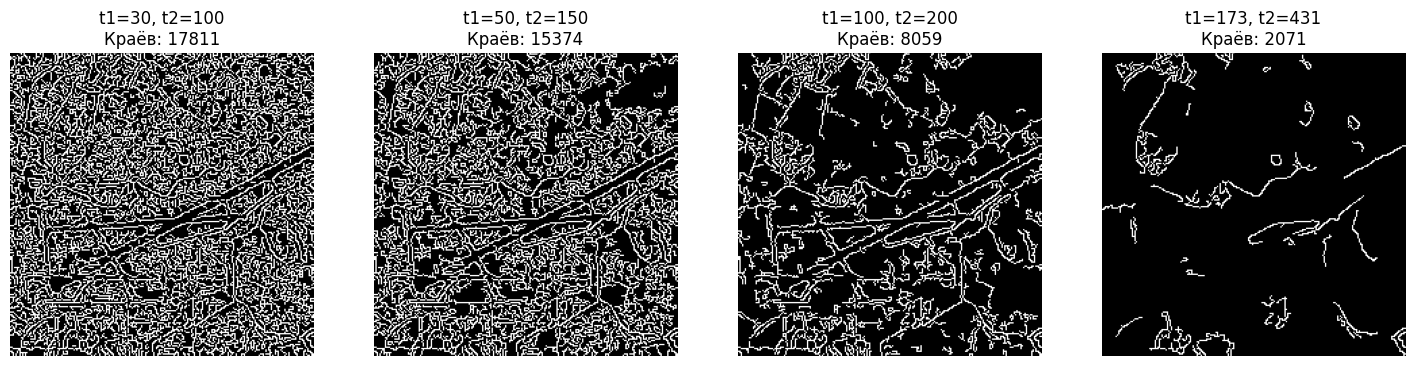

In [794]:
import matplotlib.pyplot as plt

# Тест разных наборов
params = [(30, 100), (50, 150), (100, 200), (173, 431)]  # Включая рекомендуемые
fig, axs = plt.subplots(1, len(params), figsize=(18, 5))
for i, (t1, t2) in enumerate(params):
    edges = cv2.Canny(image_gray, t1, t2, apertureSize=3)
    num_edges = np.sum(edges > 0)
    axs[i].imshow(edges, cmap='gray')
    axs[i].set_title(f't1={t1}, t2={t2}\nКраёв: {num_edges}')
    axs[i].axis('off')
plt.show()

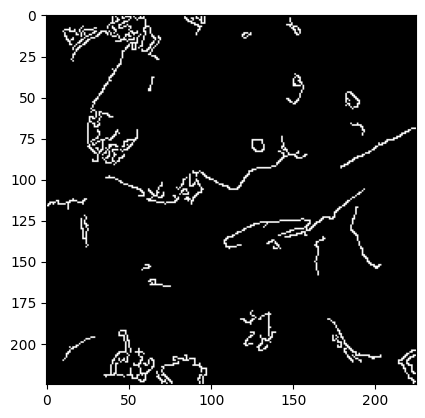

In [795]:
plt.imshow(edges, cmap="gray")

2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.